In [34]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 

warnings.filterwarnings("ignore", category=DeprecationWarning)

df = pd.read_csv("D:/canvas/778/covid19_tweets.csv")


In [35]:
df.head

<bound method NDFrame.head of                      user_name               user_location  \
0                       ᏉᎥ☻լꂅϮ                  astroworld   
1                Tom Basile 🇺🇸                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ⏳                   🇨🇦 Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  \
0       wednesday addams as a disney princess keepin i...   
1       Husband, Father, Columnist & Commentator. Auth...   
2       #Christian #Catholic #Conservative

In [36]:
df.shape

(179108, 13)

In [37]:
#2. Tweets Preprocessing and Cleaning

select_co=df[['user_location', 'text']]
print(select_co['text'])
select_co.head


0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object


<bound method NDFrame.head of                      user_location  \
0                       astroworld   
1                     New York, NY   
2                 Pewee Valley, KY   
3             Stuck in the Middle    
4                Jammu and Kashmir   
...                            ...   
179103             Ilorin, Nigeria   
179104                     Ontario   
179105                   🇨🇦 Canada   
179106               New York City   
179107  Aliwal North, South Africa   

                                                     text  
0       If I smelled the scent of hand sanitizers toda...  
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...  
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...  
3       @brookbanktv The one gift #COVID19 has give me...  
4       25 July : Media Bulletin on Novel #CoronaVirus...  
...                                                   ...  
179103  Thanks @IamOhmai for nominating me for the @WH...  
179104  2020! The year of insanit

In [38]:
#2.1 remove the stop words & punctuation marks( Noise Removal), lower the capital cases 

#A Removing Twitter Handles (#)

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 


df['tidy_tweet'] = np.vectorize(remove_pattern)(df['text'], "#[\w]*")


#select_co['tidy_tweet'] = np.vectorize(remove_pattern)(select_co['text'], "@[\w]*")
print(df['tidy_tweet'])

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift  has give me is an a...
4         25 July : Media Bulletin on Novel   \n@kansalr...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol!  https://t.co...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for  at...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: tidy_tweet, Length: 179108, dtype: object


In [39]:
# B Removing Punctuations, Numbers, and Special Characters

df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

print(df['tidy_tweet'])


0         If I smelled the scent of hand sanitizers toda...
1         Hey  Yankees  YankeesPR and  MLB   wouldn t it...
2          diane      wdunlap  realDonaldTrump Trump nev...
3          brookbanktv The one gift  has give me is an a...
4            July   Media Bulletin on Novel     kansalro...
                                ...                        
179103    Thanks  IamOhmai for nominating me for the  WH...
179104          The year of insanity  Lol   https   t co...
179105     CTVNews A powerful painting by Juan Lucena  I...
179106    More than       students test positive for  at...
179107    I stop when I see a Stop   SABCNews  IzindabaN...
Name: tidy_tweet, Length: 179108, dtype: object


In [40]:
# C Removing Short Words
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
print(df['tidy_tweet'])


0         smelled scent hand sanitizers today someone pa...
1         Yankees YankeesPR wouldn have made more sense ...
2         diane wdunlap realDonaldTrump Trump never once...
3         brookbanktv gift give appreciation simple thin...
4         July Media Bulletin Novel kansalrohit DrSyedSe...
                                ...                        
179103    Thanks IamOhmai nominating challenge nominate ...
179104                             year insanity https yzgn
179105    CTVNews powerful painting Juan Lucena tribute ...
179106    More than students test positive major univers...
179107    stop when Stop SABCNews IzindabaNews dailysuns...
Name: tidy_tweet, Length: 179108, dtype: object


In [41]:
#D Tokenization
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [smelled, scent, hand, sanitizers, today, some...
1    [Yankees, YankeesPR, wouldn, have, made, more,...
2    [diane, wdunlap, realDonaldTrump, Trump, never...
3    [brookbanktv, gift, give, appreciation, simple...
4    [July, Media, Bulletin, Novel, kansalrohit, Dr...
Name: tidy_tweet, dtype: object

In [42]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\启超\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
#E Stemming(Lexicon Normalization)

from nltk.stem.porter import *
stemmer = PorterStemmer()

from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet = tokenized_tweet.apply(lambda x: [lem.lemmatize(i, "v") for i in x]) # lemmatize

tokenized_tweet.head()

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['tidy_tweet'] = tokenized_tweet

In [44]:
# from gensim.models import Word2Vec
# sentences = [['data', 'science'], ['vidhya', 'science', 'data', 'analytics'],['machine', 'learning'], ['deep', 'learning']]

# # train the model on your corpus  
# model = Word2Vec(sentences, min_count = 1)

# print model.similarity('data', 'science')
# >>> 0.11222489293

# print model['learning']  
# >>> array([ 0.00459356  0.00303564 -0.00467622  0.00209638, ...])



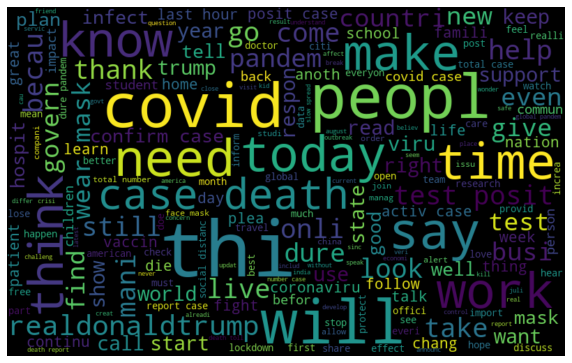

In [45]:
#3. Story Generation and Visualization from Tweets
#A) Understanding the common words used in the tweets: WordCloud



# from nltk.tokenize.moses import MosesDetokenizer

# detokenizer= MosesDetokenizer() for I in Range (len (tokenized_tweet)): 

# tokenized_tweet[i] = detokenizer.detokenize(tokenized_tweet[i], return_str=True)

# df['tidy_tweet'] = tokenized_tweet


all_words = ' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()